<a href="https://colab.research.google.com/github/Morilla123/Curso/blob/main/multi_mnist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dead code

## Inport librarys

In [424]:
import numpy as np                   # math library
import matplotlib.pyplot as plt      
import random                        # for generating random numbers
from google.colab.patches import cv2_imshow
import tensorflow as tf
import seaborn as sns


from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils  
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

### Fix compatibiliti problem whit cv2

In [ ]:
%%capture
!pip install opencv-python-headless=='4.1.2.30'
!pip list | grep open
import cv2


### Mount Google Drive acceses to Data

In [91]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Load dato Mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [13]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


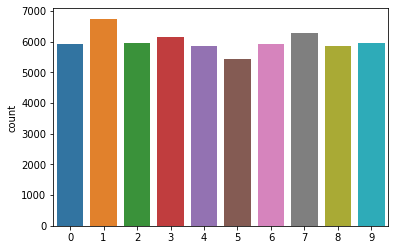

In [432]:
sns.countplot(y_train)

5


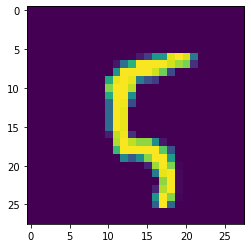

In [434]:
plt.imshow(X_train[100][:,:,0])
print(y_train[100])

In [ ]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## Model Mnist Simple

In [8]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax')) 

In [ ]:
model.summary()

### Model compile

In [ ]:
epochs = 5
batch_size 64

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [11]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [14]:
train_generator = gen.flow(X_train, Y_train, batch_size=batch_size)
test_generator = test_gen.flow(X_test, Y_test, batch_size=batch_size)

### Model fit

In [20]:
history = model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs= epochs, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128, callbacks=[callbacks])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/5
468/468 [==============================] - 173s 366ms/step - loss: 0.1304 - accuracy: 0.9601 - val_loss: 0.1081 - val_accuracy: 0.9636
Epoch 2/5
468/468 [==============================] - 170s 363ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0728 - val_accuracy: 0.9764
Epoch 3/5
468/468 [==============================] - 171s 366ms/step - loss: 0.0413 - accuracy: 0.9874 - val_loss: 0.0223 - val_accuracy: 0.9933
Epoch 4/5
468/468 [==============================] - 171s 365ms/step - loss: 0.0335 - accuracy: 0.9894 - val_loss: 0.0350 - val_accuracy: 0.9879
Epoch 5/5
468/468 [==============================] - 171s 364ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0338 - val_accuracy: 0.9899


### Evaluate metrics

In [21]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 8s 24ms/step - loss: 0.0337 - accuracy: 0.9899
Test score: 0.03372067213058472
Test accuracy: 0.9898999929428101


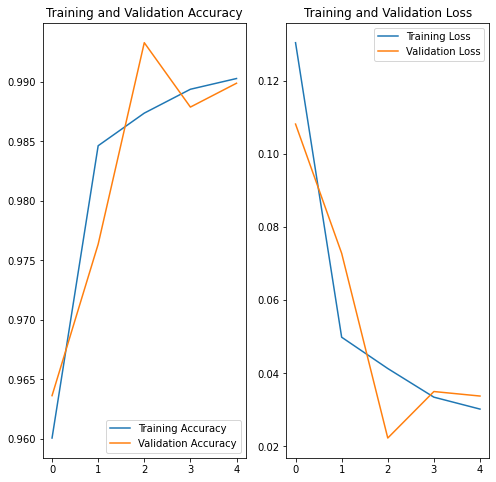

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [459]:
# Predict the values from the testing dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

In [464]:
Y_test.shape

(10000, 10)

In [465]:
# Convert testing observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

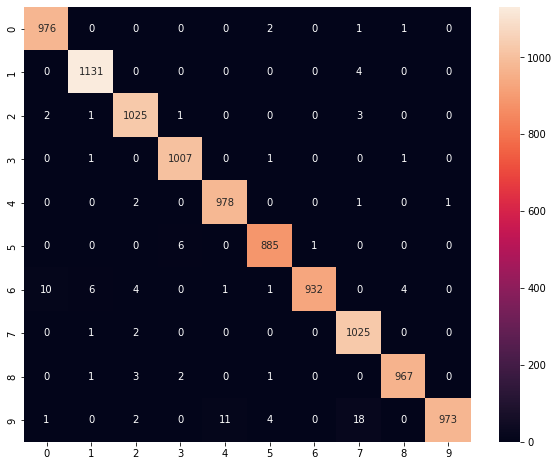

In [466]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

## Save model

In [74]:
model.save('MNIST.h5')

## Prepros data for inference

2


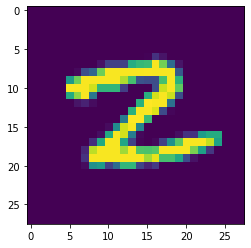

In [448]:
plt.imshow(X_train[143][:,:,0])
print(y_train[143])
test = X_train[143][:,:,0]

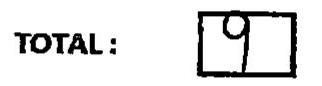

(86, 322, 3)


In [389]:
img = cv2.imread('/content/99.jpg')
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img.shape)

In [390]:
hight,width,_ = img.shape 
print(hight,width)

86 322


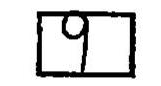

(86, 161, 3)


In [391]:
img = img[0:hight,int(width/2):width]
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img.shape)

In [392]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # es posible que esta linea no la necesitemos

In [362]:
# test = img

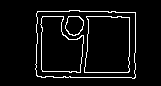

(86, 161)


In [393]:
img = cv2.Canny(img, 250, 250)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img.shape)

In [ ]:
# Inecesario
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
# dilate = cv2.dilate(canny, kernel, iterations=1)
# cv2_imshow(dilate)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# print(dilate.shape)

In [344]:
# cont,jerarq=cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# len(cont)

42

In [345]:
# c = max(cont, key=cv2.contourArea)
# rect = cv2.minAreaRect(c)
# box = cv2.boxPoints(rect)
# img = cv2.drawContours(img, [np.int0(box)], -1, (255,0 , 2), 2)

In [ ]:
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# print(img.shape)

In [394]:
# img = cv2.resize(img,(28,28))
dim = (28,28)
img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(img.shape)

(28, 28)


In [348]:
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# print(img.shape)

In [395]:
img = np.expand_dims(img, axis=-1)
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print(img.shape)

(28, 28, 1)


In [396]:
# img.shape

(28, 28, 1)

In [397]:
img = np.expand_dims(img, axis=0)
# cv2_imshow(img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
print(img.shape)

(1, 28, 28, 1)


In [449]:
test = np.expand_dims(test, axis=0)
test = np.expand_dims(test, axis=-1)
test.shape


(1, 28, 28, 1)

In [450]:
predictions = model.predict(test)
predictions[0]

array([8.2085688e-07, 2.5599287e-05, 9.9991751e-01, 1.2299106e-05,
       2.4487090e-07, 4.6788923e-08, 1.5045887e-07, 4.3146902e-05,
       2.2743345e-07, 9.1909600e-09], dtype=float32)

In [451]:
score = np.argmax(predictions[0])
score

2

# Es completamente inviable con mnist

## Import libraris

In [468]:
%%capture 
!pip install opencv-python-headless=='4.1.2.30'
!pip list | grep open

In [469]:
import numpy as np                   # math library
import matplotlib.pyplot as plt      
import random                        # for generating random numbers
from google.colab.patches import cv2_imshow
import tensorflow as tf
import seaborn as sns
import cv2


from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils  
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

### Mount Google Drive acceses to Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive
